# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
!pip install numpy pandas sklearn scipy yellowbrick

In [2]:
# The code below will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Importing libraries to read and manipulate the data
import numpy as np
import pandas as pd

# Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Using Pandas the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Using pandas to set the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Sklearn library features various classification, regression and clustering algorithms including k-means
import sklearn as sk

# Using sklearn to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# library for computing distances
from scipy.spatial.distance import pdist, cdist

# Using sklearn to perform k-means clustering, compute metric
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# library to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# Yellowbrick is a suite of visual analysis and diagnostic tools designed to facilitate ML with scikit-learn. 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Using sklearn to perform PCA
from sklearn.decomposition import PCA

In [9]:
# Loading the stock_data.csv dataset
data = pd.read_csv("stock_data.csv")

## Data Overview

- Observations
- Sanity checks

In [10]:
data.head(-5)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,XL,XL Capital,Financials,Property & Casualty Insurance,39.180000,7.696534,0.991011,10,99,734422000,1201560000,4.22,2.847299e+08,9.284360,-7.762677
331,XOM,Exxon Mobil Corp.,Energy,Integrated Oil & Gas,77.949997,3.656915,1.370062,9,7,-911000000,16150000000,3.85,4.194805e+09,20.246752,-2.706443
332,XRAY,Dentsply Sirona,Health Care,Health Care Supplies,60.849998,19.901474,1.007230,11,60,133000000,251200000,1.79,1.403352e+08,33.994412,0.855096
333,XRX,Xerox Corp.,Information Technology,IT Consulting & Other Services,10.630000,9.474768,1.866680,5,26,-43000000,474000000,0.42,1.128571e+09,25.309524,-0.295949


### Number of Rows and Columns

In [11]:
data.shape

(340, 15)

The dataset has 340 rows and 15 columns.

In [12]:
# Let's view a random sample of the dataset
data.sample(n=12, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

Ticker Symbol, Security, GICS Sector & GICS Sub Industry are of object type. The rest of the columns are of type float64 or int64

### Checking for missing values

In [14]:
# checking for null values 
data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

The dataset has no missing values.

### Let's have a look at the summary of the dataset

In [15]:
# statistical summary of the data
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


Let's check for duplicate values

In [16]:
# lets check duplicate observations
data.duplicated().sum()

0

We have no duplicate values in the dataset

In [19]:
# Lets create a copy of the dataframe. It is good practice to do so to avoid making changes to the original dataframe.
df = data.copy()

### Dropping Ticker Symbol

In [20]:
# let's fix the column names and add "_" between words.
df.columns = [i.replace(" ", "_") for i in df.columns]

In [21]:
# It is just a symbol and isn't required for further processing

df.drop("Ticker_Symbol", axis=1, inplace=True)

In [22]:
df.head()

,Security,GICS_Sector,GICS_Sub_Industry,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
0,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [27]:
# Let's create a function to label barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [28]:
# Let's create a function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Selecting the numerical columns

In [29]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

In [30]:
num_cols

['Current_Price',
 'Price_Change',
 'Volatility',
 'ROE',
 'Cash_Ratio',
 'Net_Cash_Flow',
 'Net_Income',
 'Earnings_Per_Share',
 'Estimated_Shares_Outstanding',
 'P/E_Ratio',
 'P/B_Ratio']

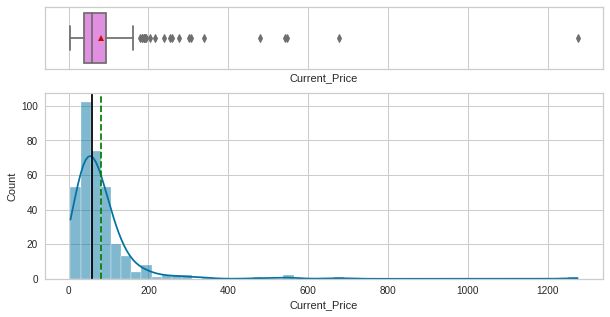

In [31]:
histogram_boxplot(df, num_cols[0], bins=50, kde=True, figsize=(10, 5))

Current_Price is right skewed with several positive outliers

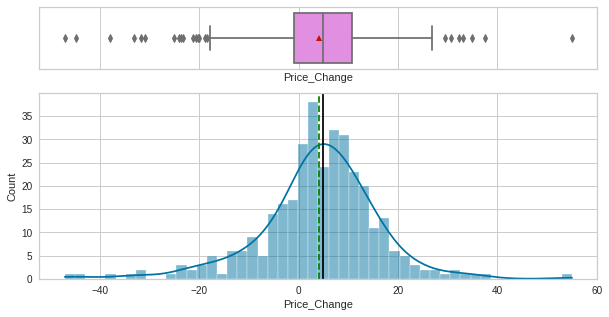

In [32]:
histogram_boxplot(df, num_cols[1], bins=50, kde=True, figsize=(10, 5))

Price_Change has a normal distribution. There are a few negative and positive outliers present

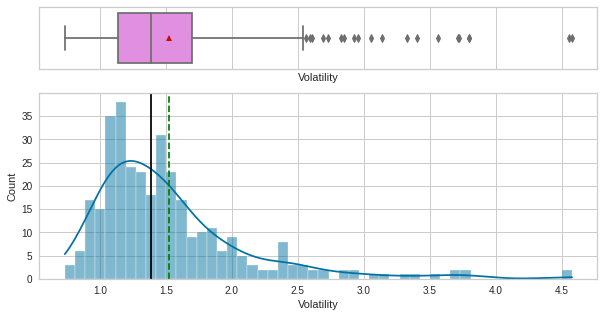

In [33]:
histogram_boxplot(df, num_cols[2], bins=50, kde=True, figsize=(10, 5))

Volatility is right skewed with some positive outliers 

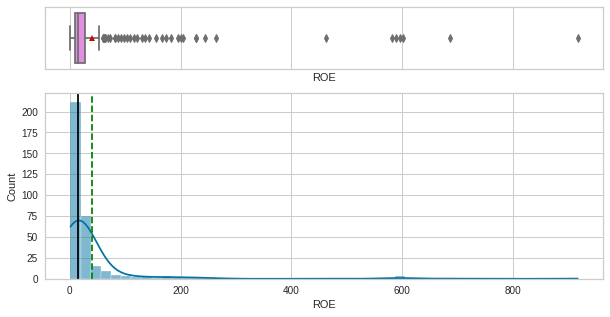

In [34]:
histogram_boxplot(df, num_cols[3], bins=50, kde=True, figsize=(10, 5))

ROE is right skewed with several positive outliers

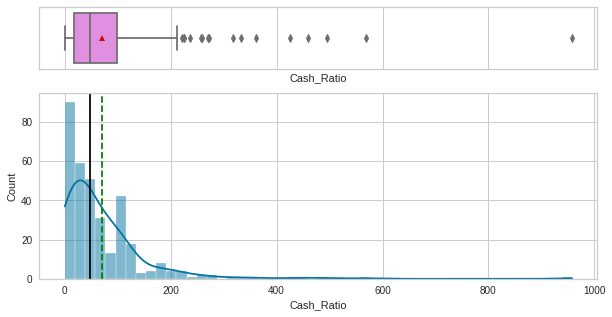

In [35]:
histogram_boxplot(df, num_cols[4], bins=50, kde=True, figsize=(10, 5))

Cash_Ratio is right skewed with a few positive outliers

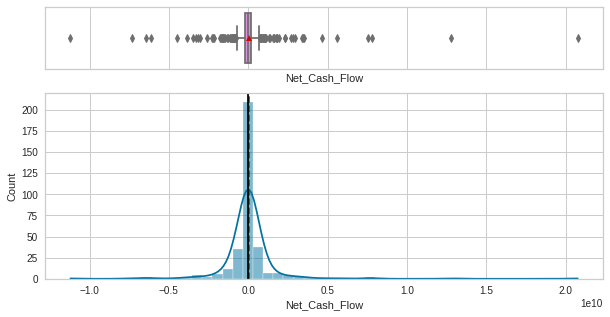

In [36]:
histogram_boxplot(df, num_cols[5], bins=50, kde=True, figsize=(10, 5))

Net_Cash_Flow has a normal distribution. There are several positive and negative outliers present.

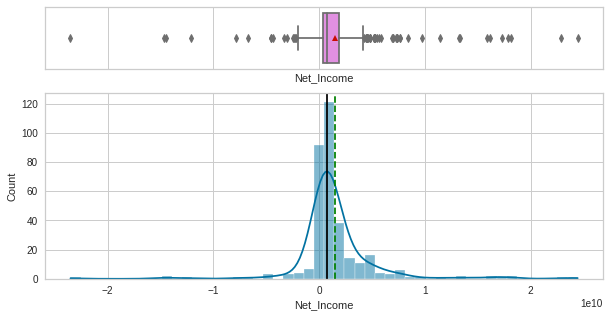

In [37]:
histogram_boxplot(df, num_cols[6], bins=50, kde=True, figsize=(10, 5))

Net_Income has a normal distribution. There are some positive and a few negative outliers

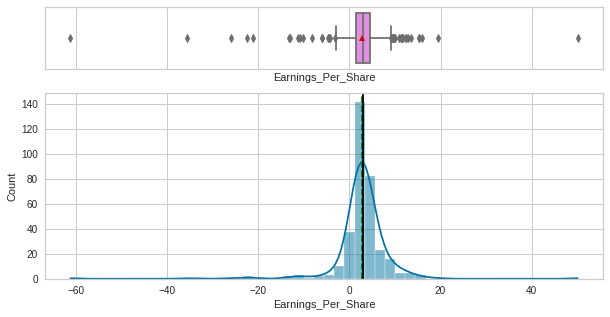

In [38]:
histogram_boxplot(df, num_cols[7], bins=50, kde=True, figsize=(10, 5))

Earnings_Per_Share has a normal distribution. There are some positive and negative outliers

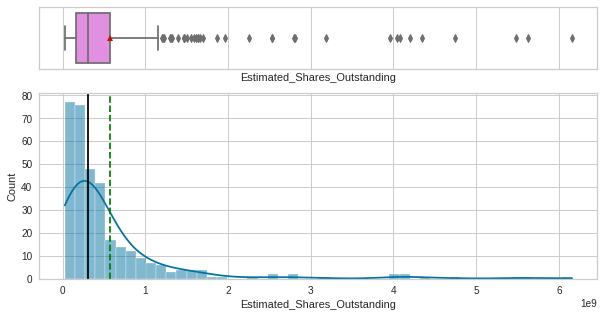

In [39]:
histogram_boxplot(df, num_cols[8], bins=50, kde=True, figsize=(10, 5))

Estimated_Shares_Outstanding is right skewed with several positive outliers

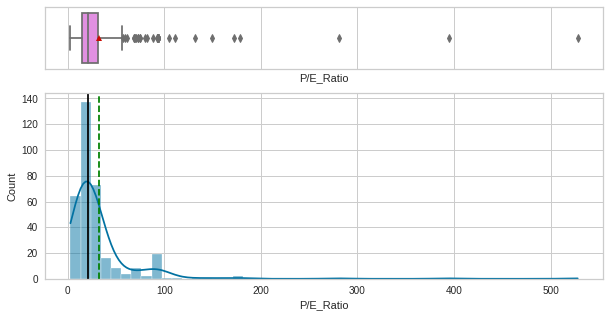

In [40]:
histogram_boxplot(df, num_cols[9], bins=50, kde=True, figsize=(10, 5))

P/E_Ratio is right skewed with some positive outliers

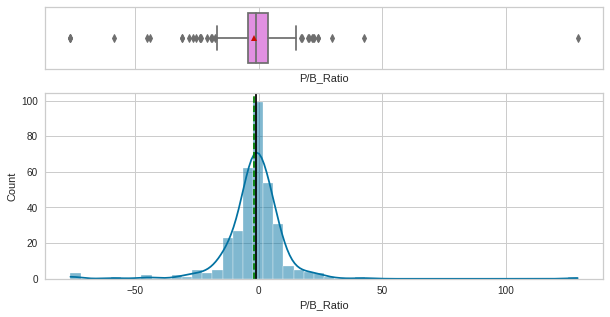

In [41]:
histogram_boxplot(df, num_cols[10], bins=50, kde=True, figsize=(10, 5))

P/B_Ratio has a normal distribution. There exist a few positive and negative outliers

### 1. What does the distribution of stock prices look like?

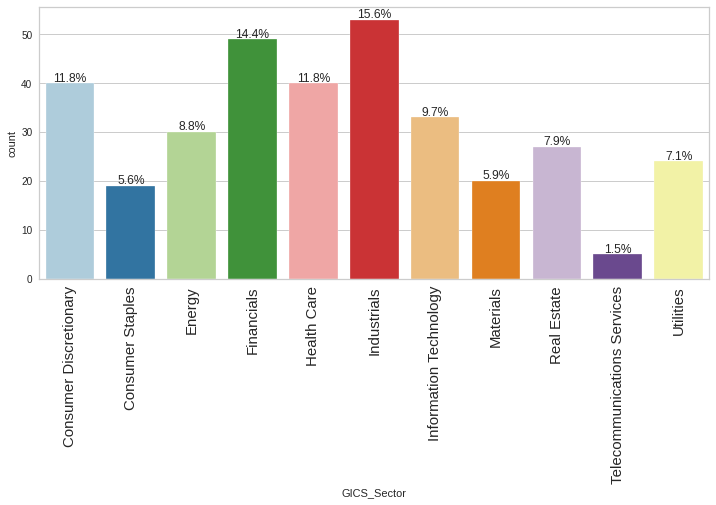

In [42]:
labeled_barplot(df, "GICS_Sector", perc=True)

Majority of the securities belong to the "Industrials" sector. It is closely followed by the "Financials" GICS Sector. The minority of securities belong to the "Telecommunication Services" sector.

### 2. The stocks of which economic sector have seen the maximum price increase on average?

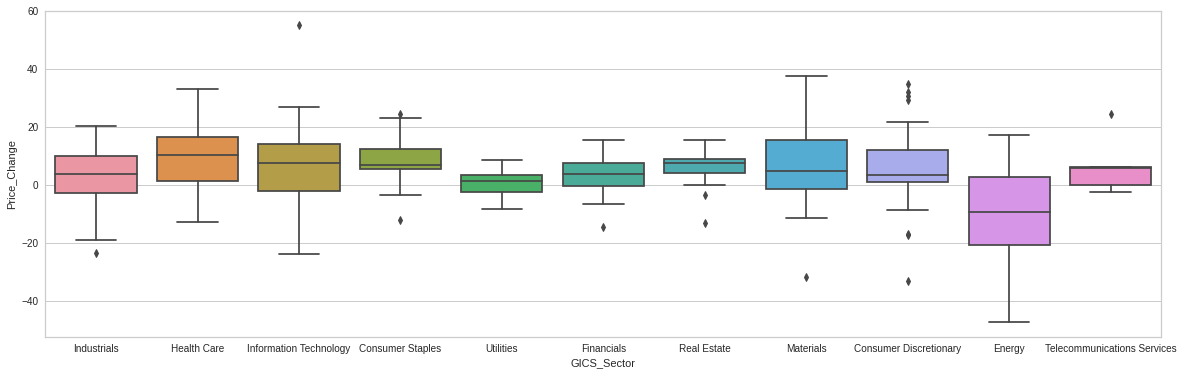

In [43]:
plt.figure(figsize=(20,6))
sns.boxplot(data = df, y = "Price_Change", x = "GICS_Sector");

The "Energy" GICS_Sector has seen the maximum variation in Price_Change across its securities. Healthcare, Information Technology, and Materials have maximum number of securities with a high positive Price_Change making them more favorable 

### 3. How are the different variables correlated with each other?

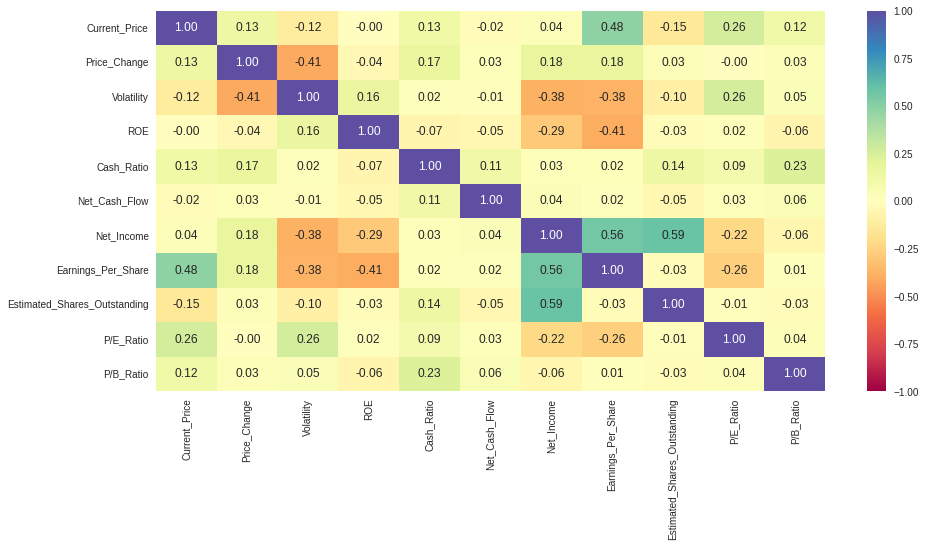

In [44]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- Earnings_Per_Share has a negative correlation with ROE and Volatility 
- Earnings_Per_Share has a positive correlation with Current_Price & Net_Income
- Estimated_Shares_Outstanding has a positive correlation with Net_Income 
- Price_Change has a negative correlation with Volatility. This explains that the more volatile the stocks, the more negative the "Price_Change"

### 4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

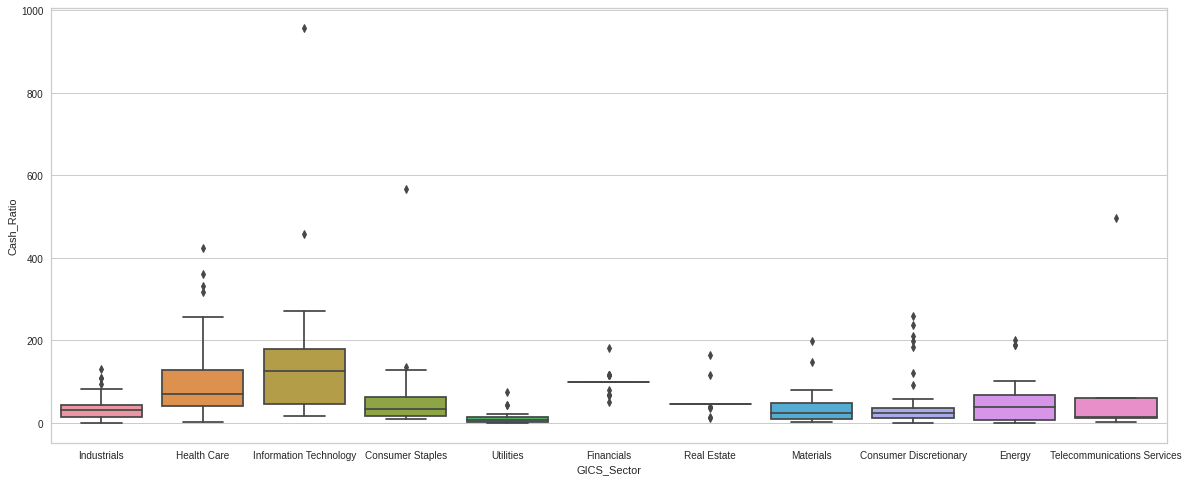

In [45]:
plt.figure(figsize=(20,8))
sns.boxplot(data = df, y = "Cash_Ratio", x = "GICS_Sector");

- Informational Technology and Health Care have the maximum Cash_Ratio variance while Real_Estate and Financials have the minimum Cash_Ratio variance across securities/companies in the respective GICS_sector
- Informational Technology has the highest positive outliers for Cash_Ratio

### 5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

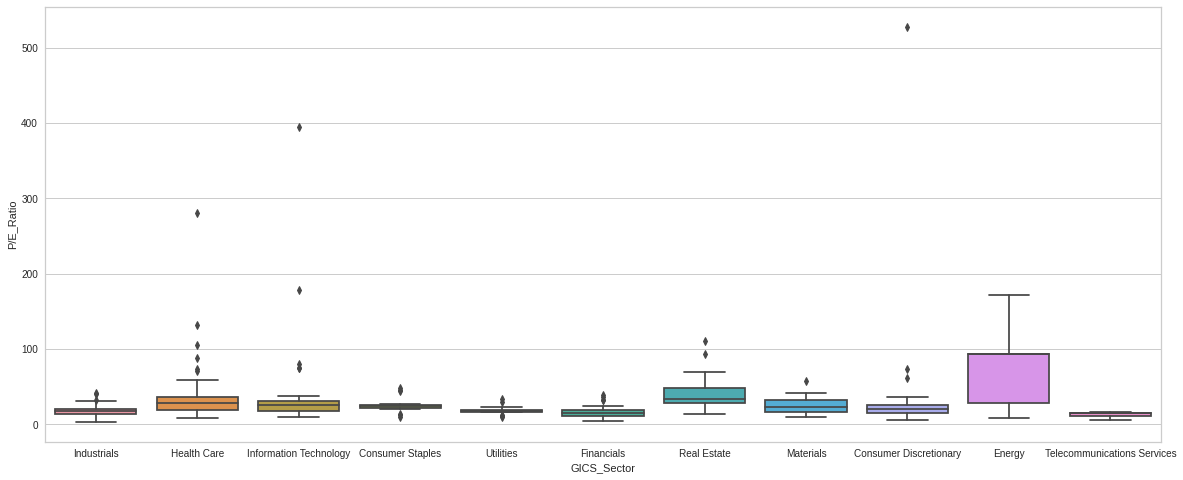

In [46]:
plt.figure(figsize=(20,8))
sns.boxplot(data = df, y = "P/E_Ratio", x = "GICS_Sector");

The Energy GICS_Sector has some of the highest variance in P/E ratios. An investor would be willing to invest more in a single share of a company in this sector per dollar of its earnings as opposed to securities/companies in other GICS_Sectors

### Let's perform a pair plot analysis

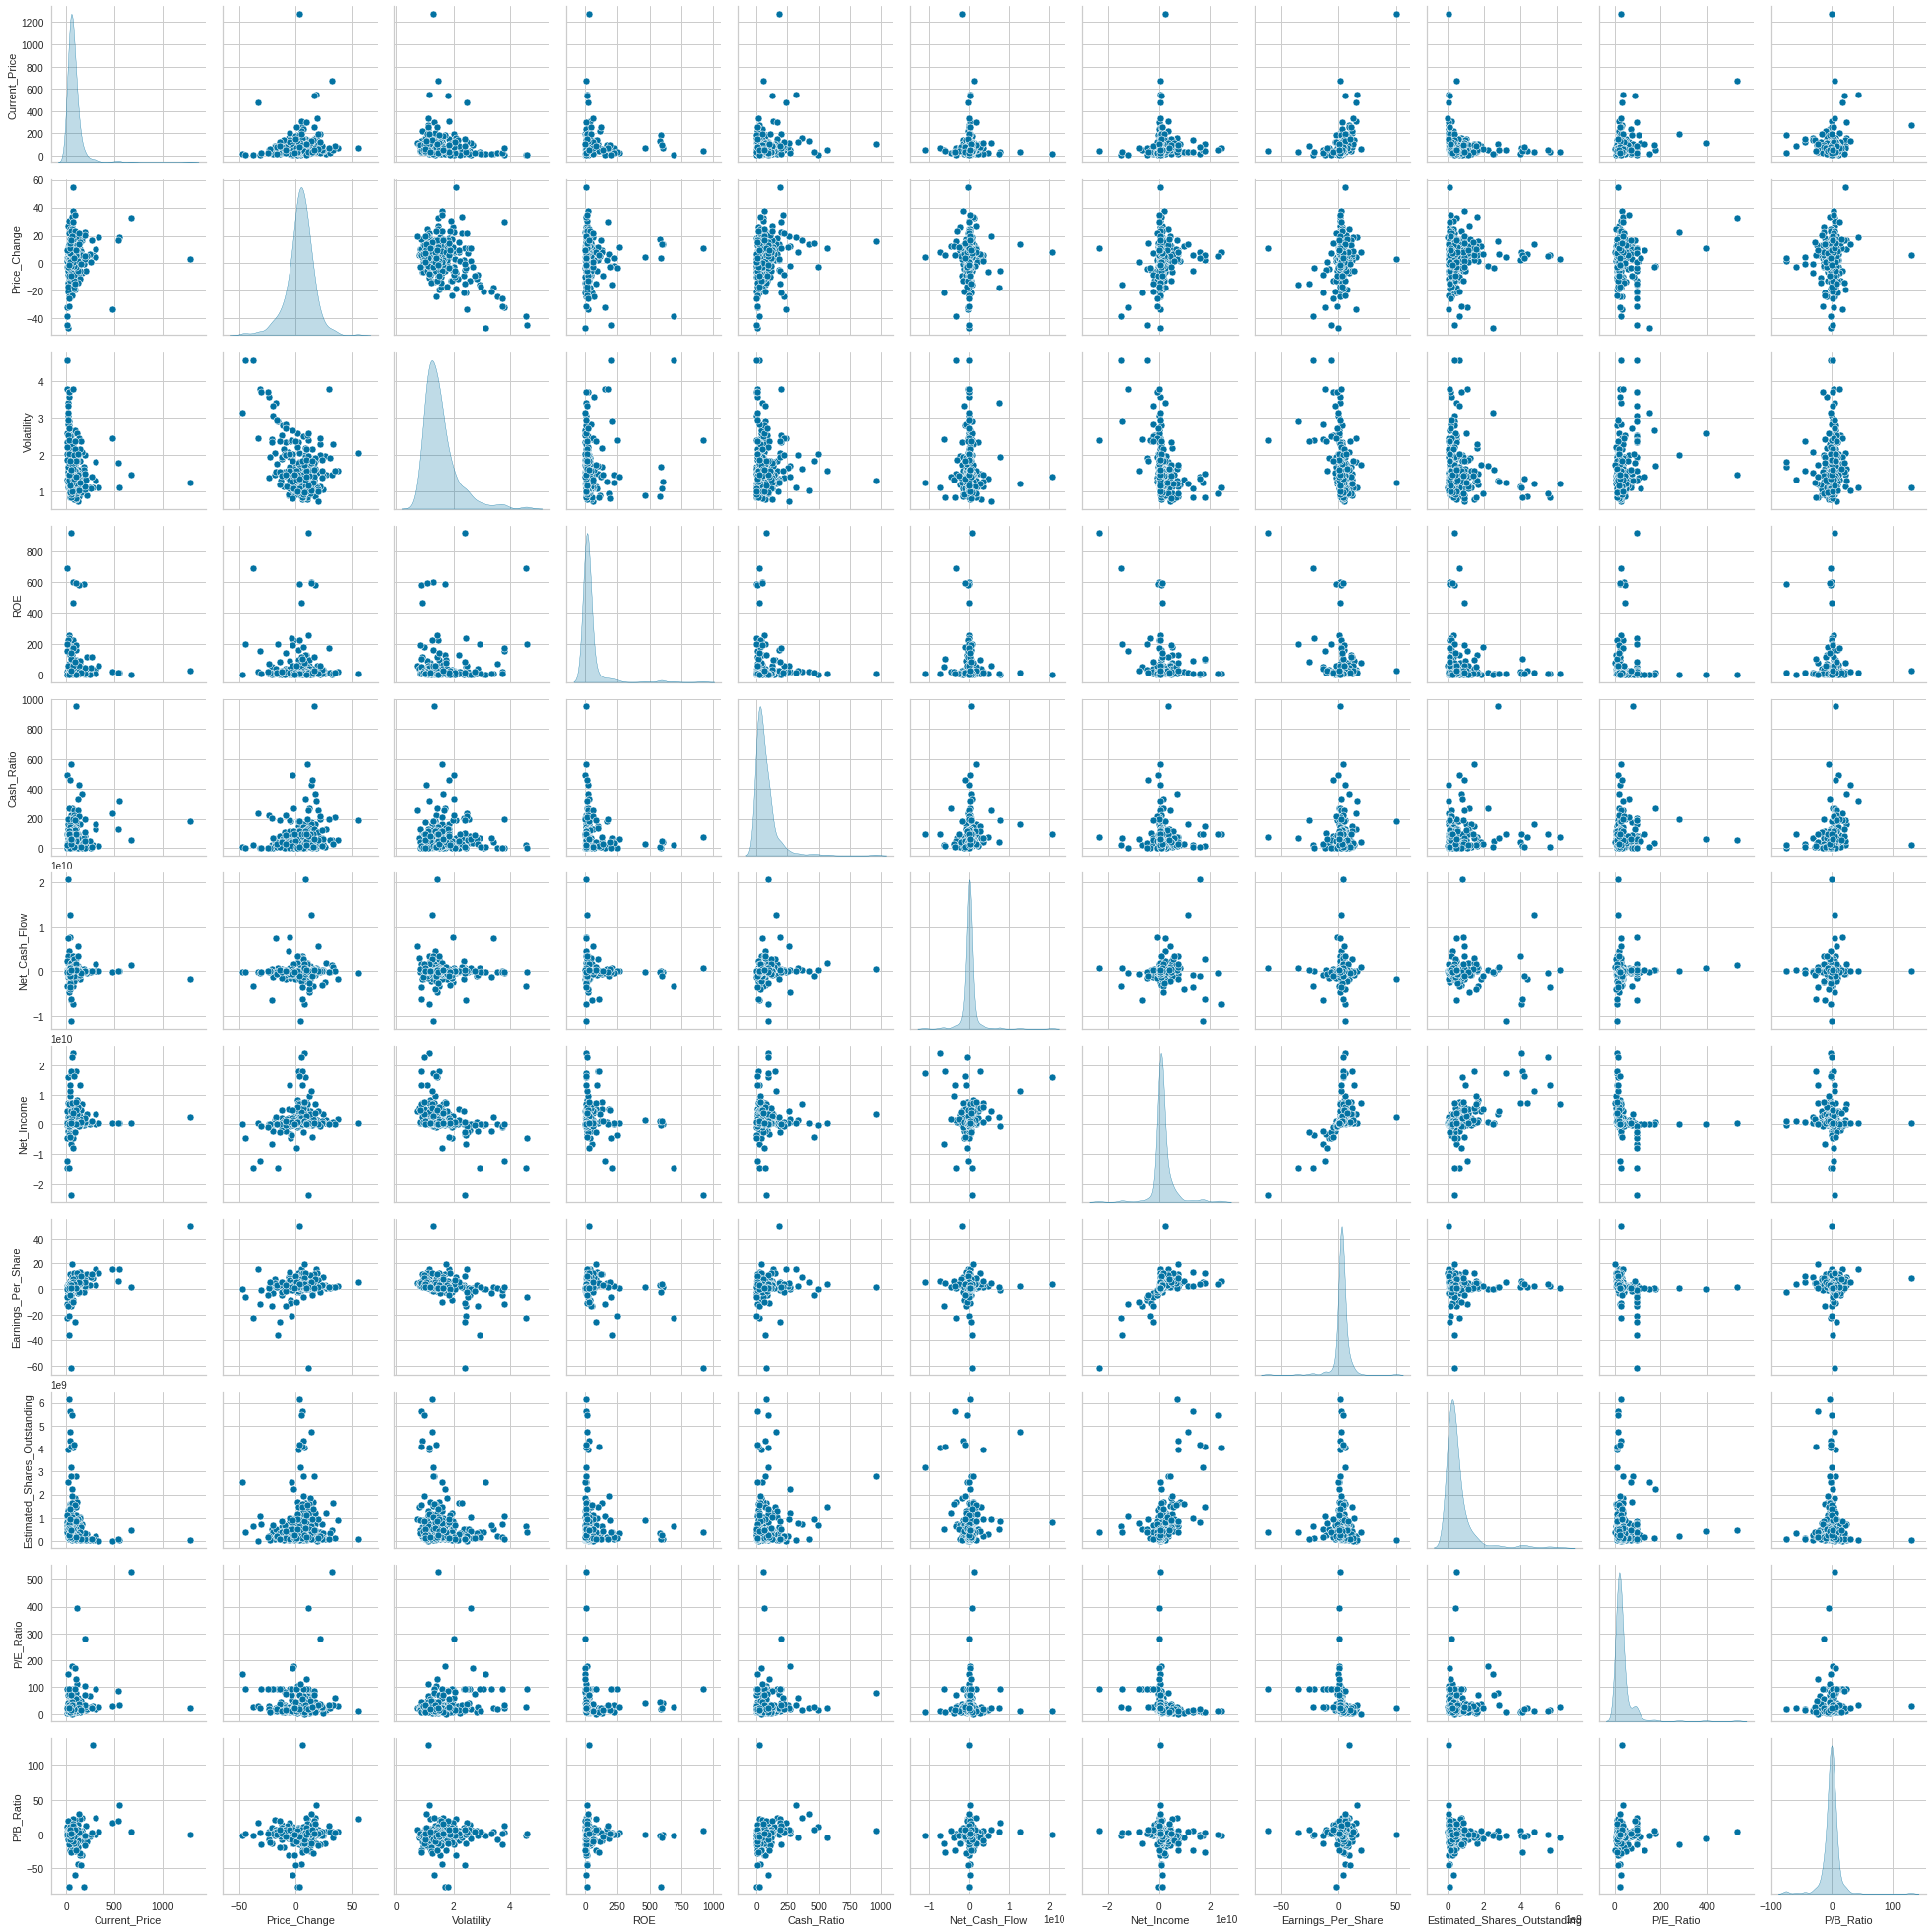

In [47]:
sns.pairplot(df[num_cols],diag_kind="kde");

A few observations:

- Volatility is trimodal.
- P/E_Ratio is bimodal.  
- All other distributions seem to have a normal distribution

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Let's perform scaling of the data so as to bring it to the same scale 

In [52]:
sx = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sx.fit_transform(df.drop(["Security", "GICS_Sector", "GICS_Sub_Industry"], axis=1)),
    columns=df.drop(["Security", "GICS_Sector", "GICS_Sub_Industry"], axis=1).columns,
)
subset_scaled_df.head(-5)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196
...,...,...,...,...,...,...,...,...,...,...,...
330,-0.425718,0.301813,-0.905299,-0.307006,0.320933,0.349310,-0.074428,0.219416,-0.346077,-0.526793,-0.433406
331,-0.029745,-0.035140,-0.263847,-0.317379,-0.698026,-0.497318,3.725040,0.163169,4.283396,-0.279242,-0.070857
332,-0.204394,1.319853,-0.877850,-0.296633,-0.111017,0.039857,-0.315982,-0.149992,-0.517038,0.031205,0.184517
333,-0.717310,0.450140,0.576558,-0.358870,-0.487589,-0.050701,-0.259353,-0.358260,0.653019,-0.164916,0.101984


### Let's perform another pair plot analysis

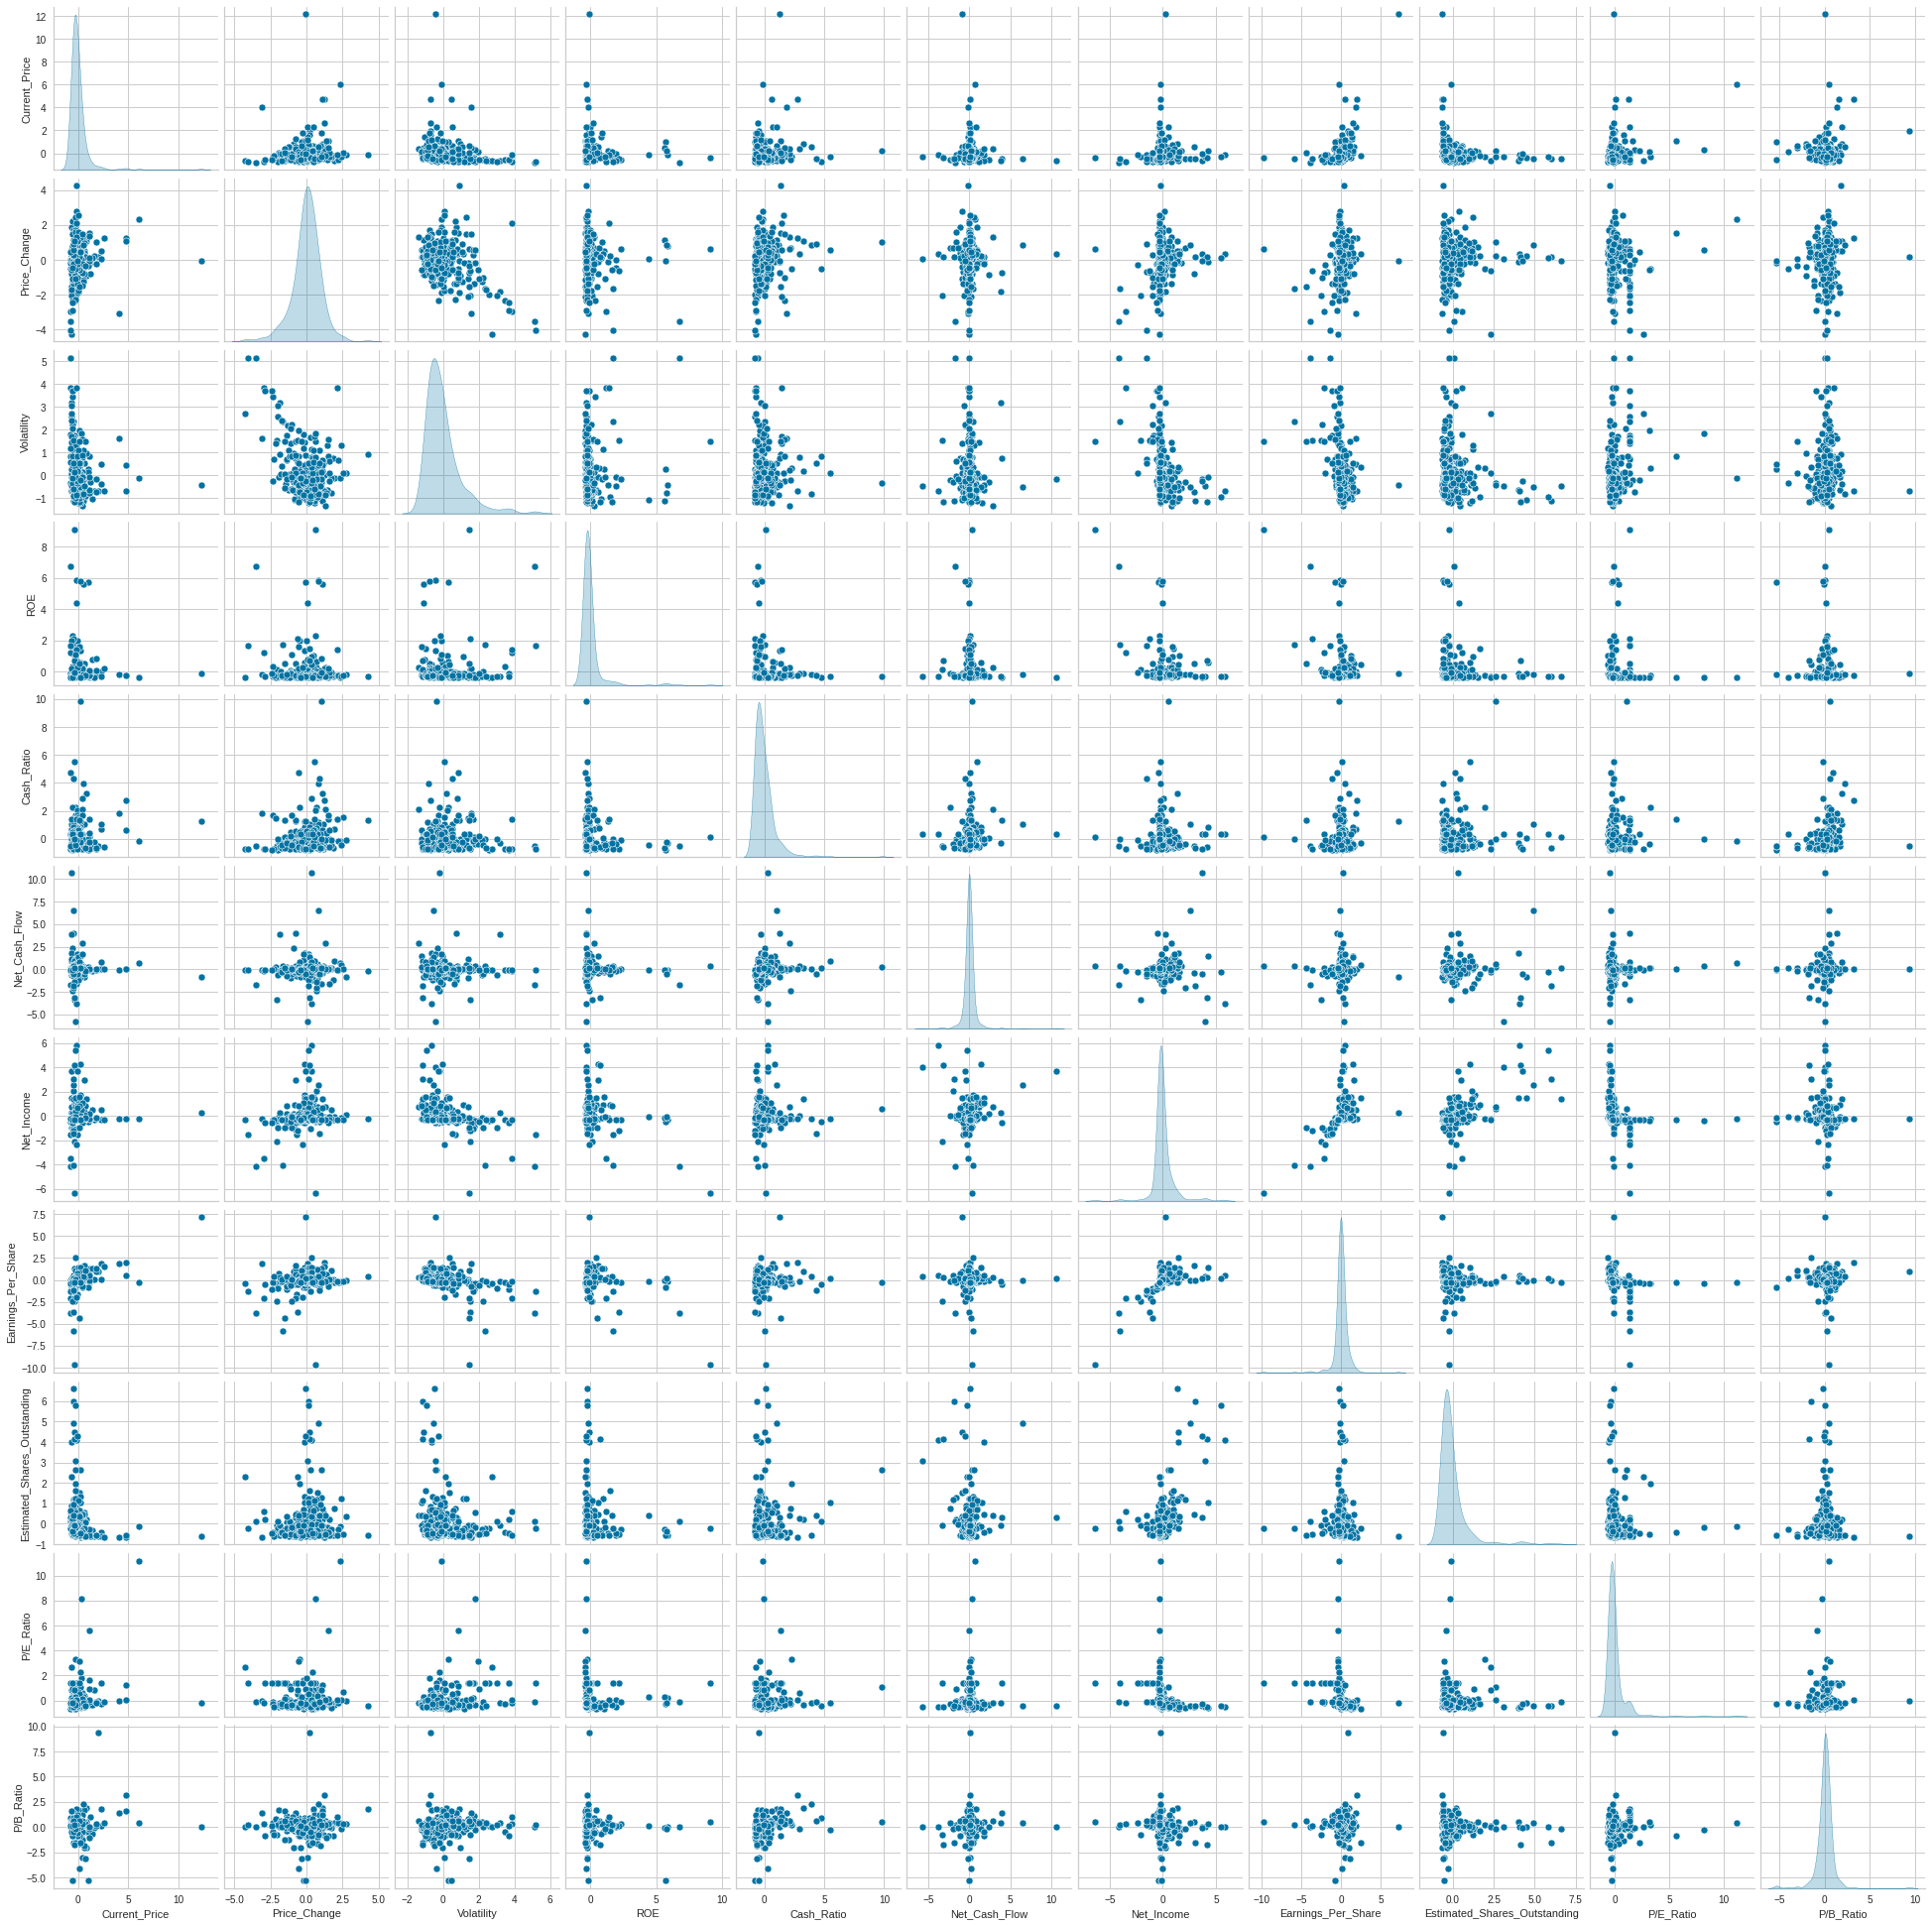

In [53]:
sns.pairplot(subset_scaled_df ,diag_kind="kde");

- The relationship between the attributes have been maintained after feature engineering (scalar transformation). However, the attributes are now all on the same scale, with an average of 0, standard deviation of 1.
- Outliers have been identified, but not treated and they are assumed to be real data points & not anomalies in this context for modeling

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [54]:
# checking for null values again
data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [55]:
# lets check duplicate observations
data.duplicated().sum()

0

The data has no missing values, nor duplicate entries. 

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2659465936501304
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.137657433522954
Number of Clusters: 6 	Average Distortion: 2.072769863902725
Number of Clusters: 7 	Average Distortion: 2.0049396373681247
Number of Clusters: 8 	Average Distortion: 1.9938135004704172


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

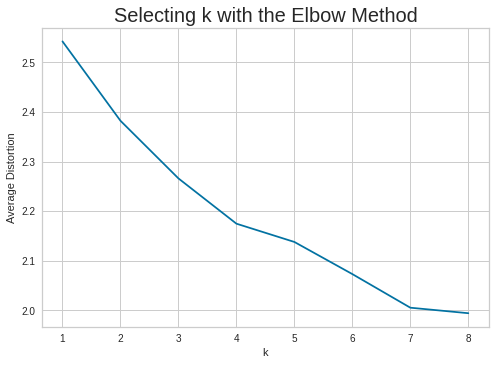

In [56]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

From these results, the appropriate K seems to be 4 or 5

In [57]:
# let's check the silhoutte score

s_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(subset_scaled_df, preds)
    s_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4469482880666969)
For n_clusters = 3, silhouette score is 0.4644405674779403)
For n_clusters = 4, silhouette score is 0.4577225970476733)
For n_clusters = 5, silhouette score is 0.42582586374711767)
For n_clusters = 6, silhouette score is 0.38473393556836616)
For n_clusters = 7, silhouette score is 0.3799080479195833)
For n_clusters = 8, silhouette score is 0.42724791924182737)
For n_clusters = 9, silhouette score is 0.4138363381120665)


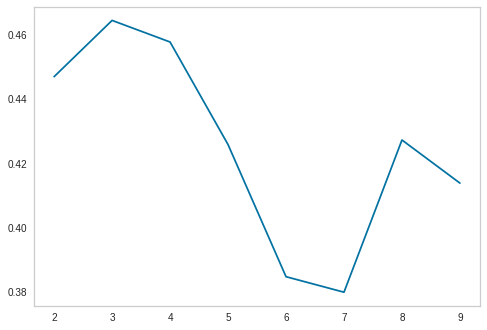

In [59]:
# Let's visualize these results
plt.plot(cluster_list,s_score)
plt.grid()

The number of clusters, "4" is a good approximate for number of clusters

### Finding optimal no. of clusters with silhouette coefficients

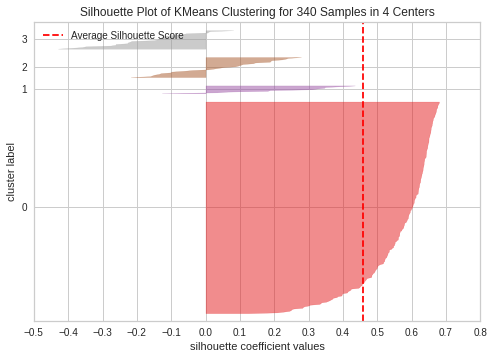

In [60]:
viz = SilhouetteVisualizer(KMeans(4, random_state = 1))
viz.fit(subset_scaled_df)    
viz.show();

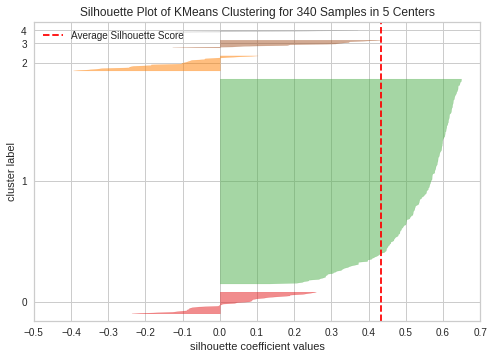

In [61]:
viz = SilhouetteVisualizer(KMeans(5, random_state = 1))
viz.fit(subset_scaled_df)    
viz.show();

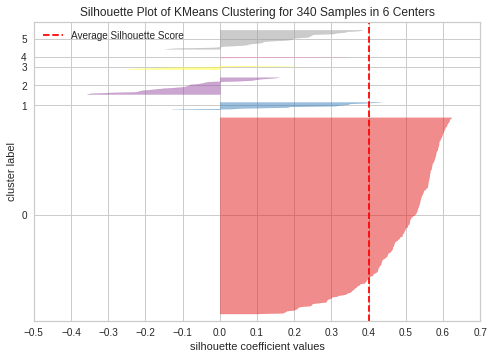

In [62]:
viz = SilhouetteVisualizer(KMeans(6, random_state = 1))
viz.fit(subset_scaled_df)    
viz.show();

### Choosing k=4 clusters

In [63]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [64]:
df['K_means_segments'] = kmeans.labels_
subset_scaled_df['K_means_segments'] = kmeans.labels_

In [65]:
cluster_profile = df.groupby('K_means_segments').mean()

In [66]:
cluster_profile['count_in_each_segments'] = df.groupby('K_means_segments')['Security'].count().values

In [67]:
cluster_profile

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
K_means_segments,,,,,,,,,,,,
0,234.170932,13.400685,1.729989,25.600000,277.640000,1.554927e+09,1.572612e+09,6.045200,5.783163e+08,74.960824,14.402452,25
1,38.099260,-15.370329,2.910500,107.074074,50.037037,-1.594285e+08,-3.887458e+09,-9.473704,4.803986e+08,90.619220,1.342067,27
2,50.517273,5.747586,1.130399,31.090909,75.909091,-1.072273e+09,1.483309e+10,4.154545,4.298827e+09,14.803577,-4.552119,11
3,72.399112,5.066225,1.388319,34.620939,53.000000,-1.404622e+07,1.482212e+09,3.621029,4.385338e+08,23.843656,-3.358948,277


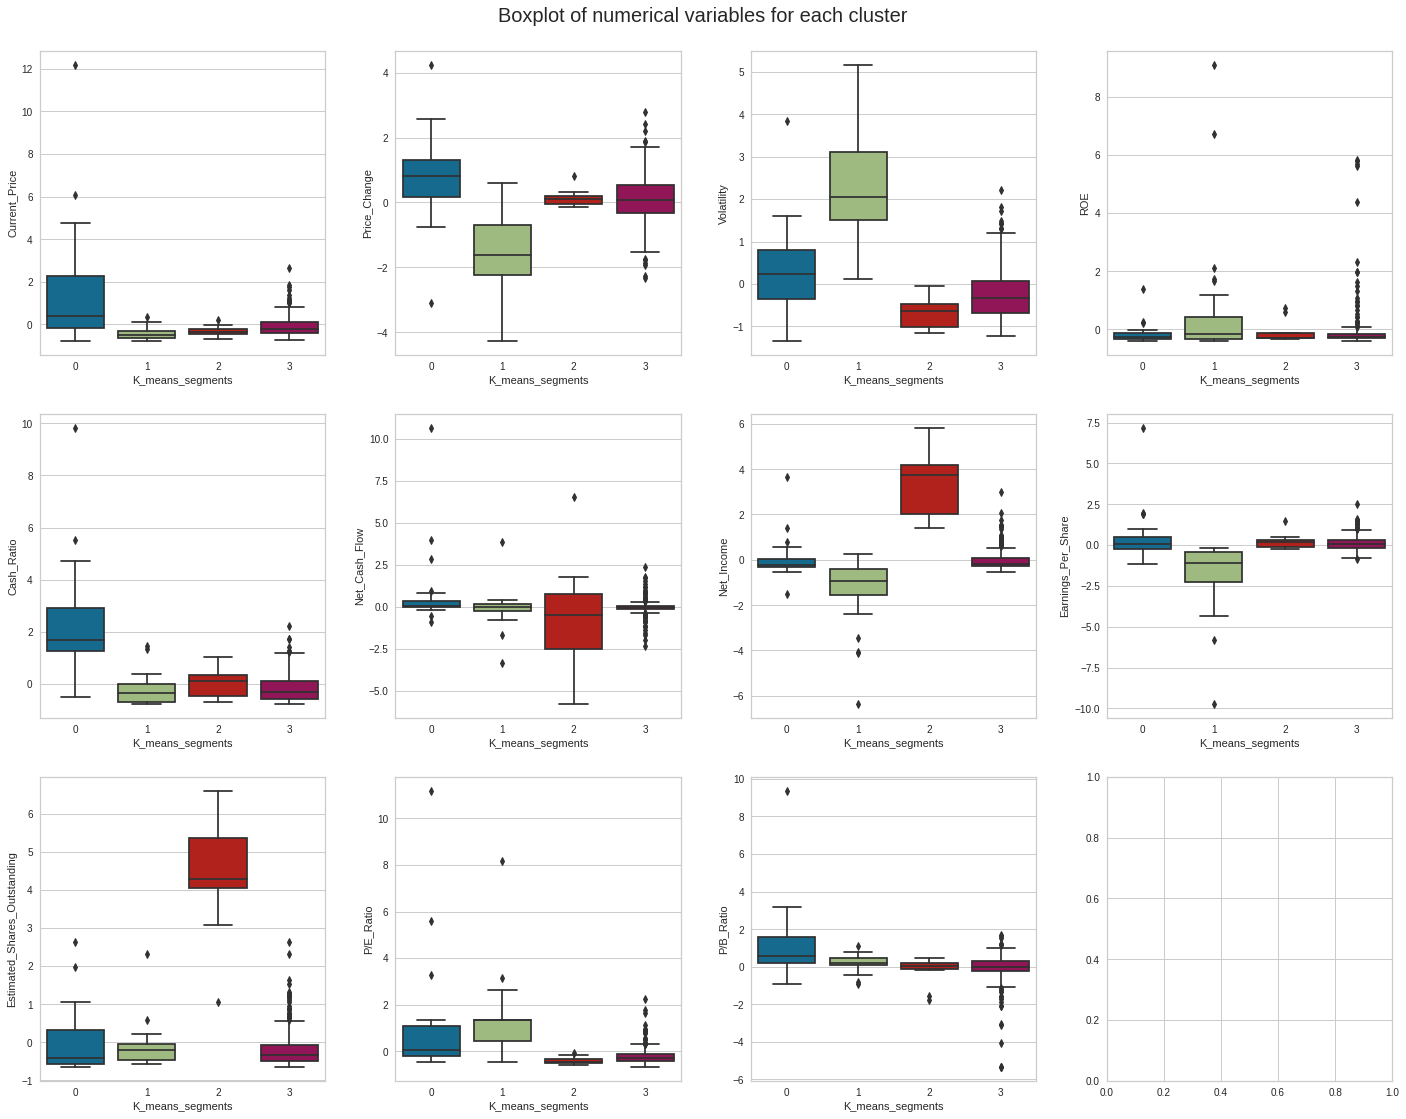

In [68]:
fig, axes = plt.subplots(3, 4,  figsize=(20, 16))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(4):
        if counter <11:
            sns.boxplot(ax=axes[ii, jj],y=subset_scaled_df[num_cols[counter]],x=subset_scaled_df['K_means_segments'])
        counter = counter+1

fig.tight_layout(pad=2.0)



### Observations and Insights

Observations:
- Cluster 0 has about 25 different securities
- Cluster 1 has about 27 different securities
- Cluster 2 has only 11 different securities
- Cluster 3 has the majority of securities at 277

Insights:
- Cluster 0 has securities with very high average Current_Price and securities with very high Cash_Ratio.
- Cluster 1 has securities with among the lowest average Current_Price and negative average Price_Change. In addition, this cluster has securities with among the highest volatility, making them more riskier.
- Cluster 3 has securities that lie in between Cluster 0 & Cluster 1.
- Cluster 2 has securities with some of the highest average Net_Income of (almost 10 times of those in Cluster 3) It also has securities with some of the highest Estimated_Shares_Outstanding (almost 10 times of those in Cluster 3)

- Clusters 2 and 3 are the safe clusters. But, clusters 2 containing more exclusive securities. 
- Clusters 0 and 1 are more riskier securities, former being high performing and later historically speaking low performing

### Using Pandas crosstab to compare cluster vs. GICS_Sector

In [69]:
pd.crosstab(df.GICS_Sector, df.K_means_segments).style.highlight_max(color = 'lightgreen', axis = 0)

K_means_segments,0,1,2,3
GICS_Sector,,,,
Consumer Discretionary,6,0,1,33
Consumer Staples,1,0,1,17
Energy,1,22,1,6
Financials,1,0,3,45
Health Care,9,0,2,29
Industrials,0,1,0,52
Information Technology,5,3,1,24
Materials,0,1,0,19
Real Estate,1,0,0,26


- Majority of securities in cluster 0 are in Health Care.
- Majority of securities in cluster 1 are in Energy division.
- Majority of securities in cluster 2 are in Financials.
- Majority of securities in cluster 3 are in Industrials.

## Hierarchical Clustering

In [70]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm


Cophenetic correlation for Euclidean distance and single linkage is 0.9304469769832865
Cophenetic correlation for Euclidean distance and complete linkage is 0.8559480642212798
Cophenetic correlation for Euclidean distance and average linkage is 0.946403836884538
Cophenetic correlation for Euclidean distance and weighted linkage is 0.7508819056084053
Cophenetic correlation for Chebyshev distance and single linkage is 0.9161627445317929
Cophenetic correlation for Chebyshev distance and complete linkage is 0.822502094153258
Cophenetic correlation for Chebyshev distance and average linkage is 0.9379218754329659
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9153206618543516
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9348505176633238
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6881861661402054
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9360657692078036
Cophenetic correlation for

### A combination of distance metric and linkage method with the highest cophenetic correlation

In [71]:
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.946403836884538, which is obtained with Euclidean distance and average linkage


In [72]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9304469769832865
Cophenetic correlation for complete linkage is 0.8559480642212798
Cophenetic correlation for average linkage is 0.946403836884538
Cophenetic correlation for centroid linkage is 0.9494262703881242
Cophenetic correlation for ward linkage is 0.7436374975239648
Cophenetic correlation for weighted linkage is 0.7508819056084053


### A combination of distance metric and linkage method with the highest cophenetic correlation

In [73]:
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9494262703881242, which is obtained with centroid linkage


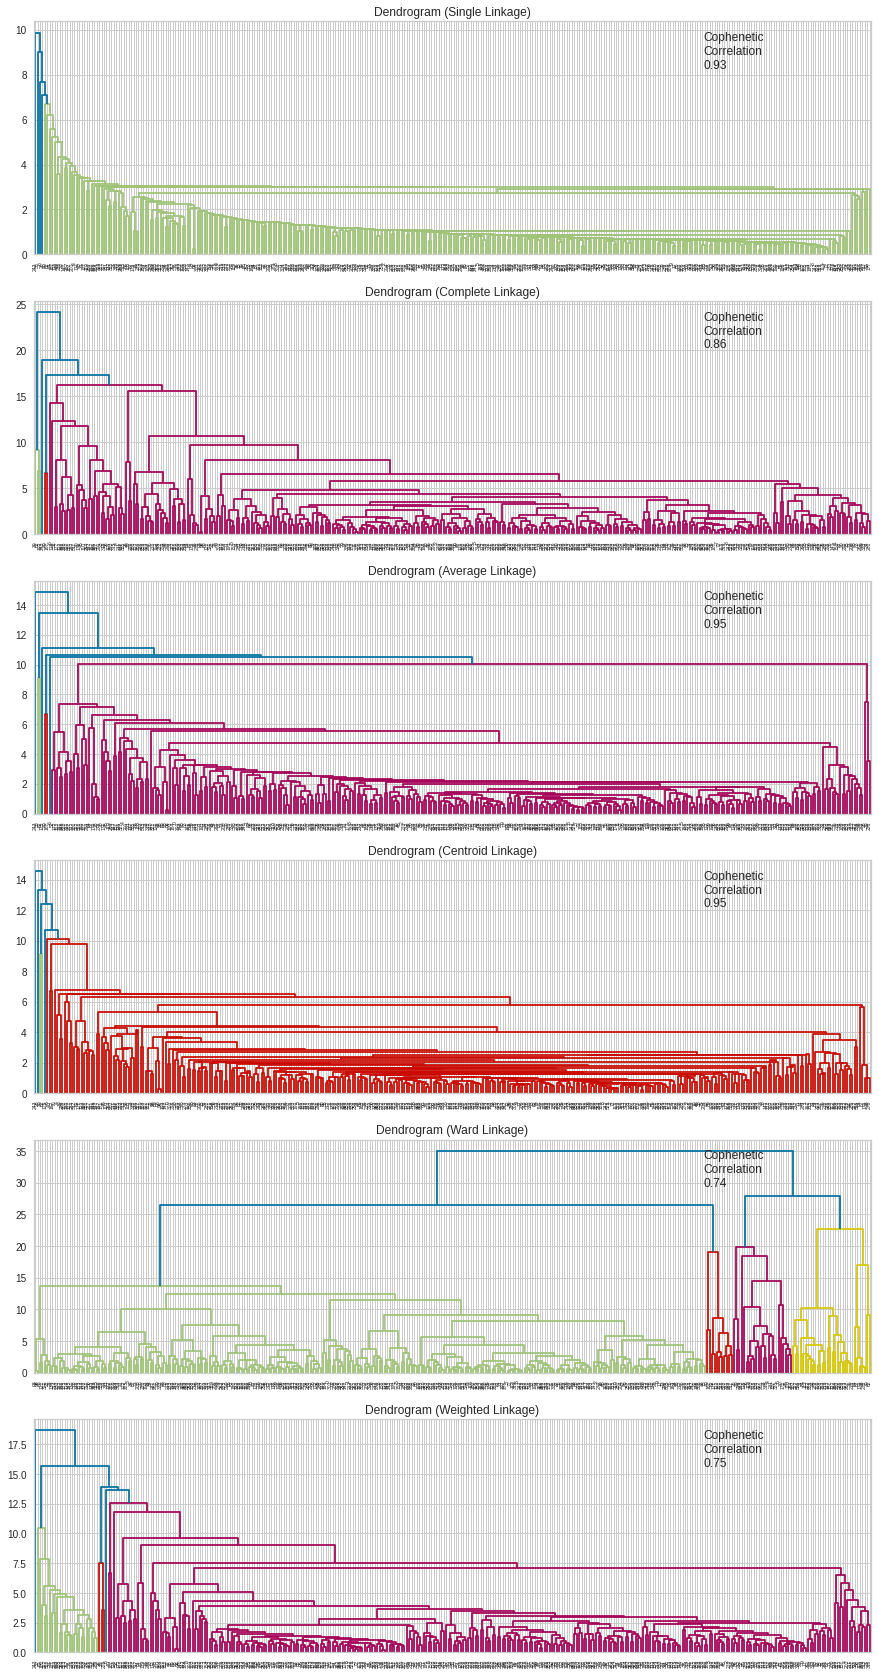

In [74]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# enumerating through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

- Cophenetic correlation is highest with eucledian distance & average or centroid linkages.
- The appropriate number of clusters from the dendrogram for average linkage is 6.

In [75]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [76]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

In [77]:
cluster_profile = df.groupby("HC_Clusters").mean()

In [78]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Security"].count().values
)

In [79]:
cluster_profile

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,77.287589,4.099730,1.518066,35.336336,66.900901,-3.319732e+07,1.538075e+09,2.88527,5.605050e+08,32.441706,-2.174921,2.630631,333
1,25.640000,11.237908,1.322355,12.500000,130.500000,1.675550e+10,1.365400e+10,3.29500,2.791829e+09,13.649696,1.508484,1.000000,2
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1.292500e+09,-1.910650e+10,-41.81500,5.195740e+08,60.748608,1.565141,1.000000,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,5.920000e+08,3.669000e+09,1.31000,2.800763e+09,79.893133,5.884467,0.000000,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1.671386e+09,2.551360e+09,50.09000,5.093552e+07,25.453183,-1.052429,0.000000,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,9.088500e+07,5.965410e+08,8.91000,6.695185e+07,31.040405,129.064585,0.000000,1


- There are 5 clusters, each with 2, 2, 1, 1, and 1 securities. This clustering does not look good as the clusters do not have enough variability
- Let's re-try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 4 appears to be the appropriate number of clusters from the dendrogram for Ward linkage



In [80]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=4)

In [81]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

In [82]:
cluster_profile = df.groupby("HC_Clusters").mean()

In [83]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Security"].count().values
)

In [84]:
cluster_profile

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,46.558126,-11.798670,2.617878,178.750000,50.250000,4.349716e+07,-3.197472e+09,-7.785312,4.732895e+08,72.496532,-0.780467,1.281250,32
1,71.846974,4.953643,1.392784,25.117216,53.831502,1.197788e+06,1.557674e+09,3.691044,4.439183e+08,23.583804,-3.087957,2.996337,273
2,229.579357,14.049986,1.735216,25.423077,268.423077,1.712688e+09,1.981882e+09,5.946923,7.219242e+08,84.216911,13.114240,0.115385,26
3,46.672222,5.166566,1.079367,25.000000,58.333333,-3.040667e+09,1.484844e+10,3.435556,4.564960e+09,15.596051,-6.354193,2.000000,9


The clusters now have more variability

### Let's visualize the names of the securities in each cluster

In [85]:
for cl in df["HC_Clusters"].unique():
    print(
        "The",
        df[df["HC_Clusters"] == cl]["Security"].nunique(),
        "Securities in cluster",
        cl,
        "are:",
    )
    print(df[df["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 273 Securities in cluster 1 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 '

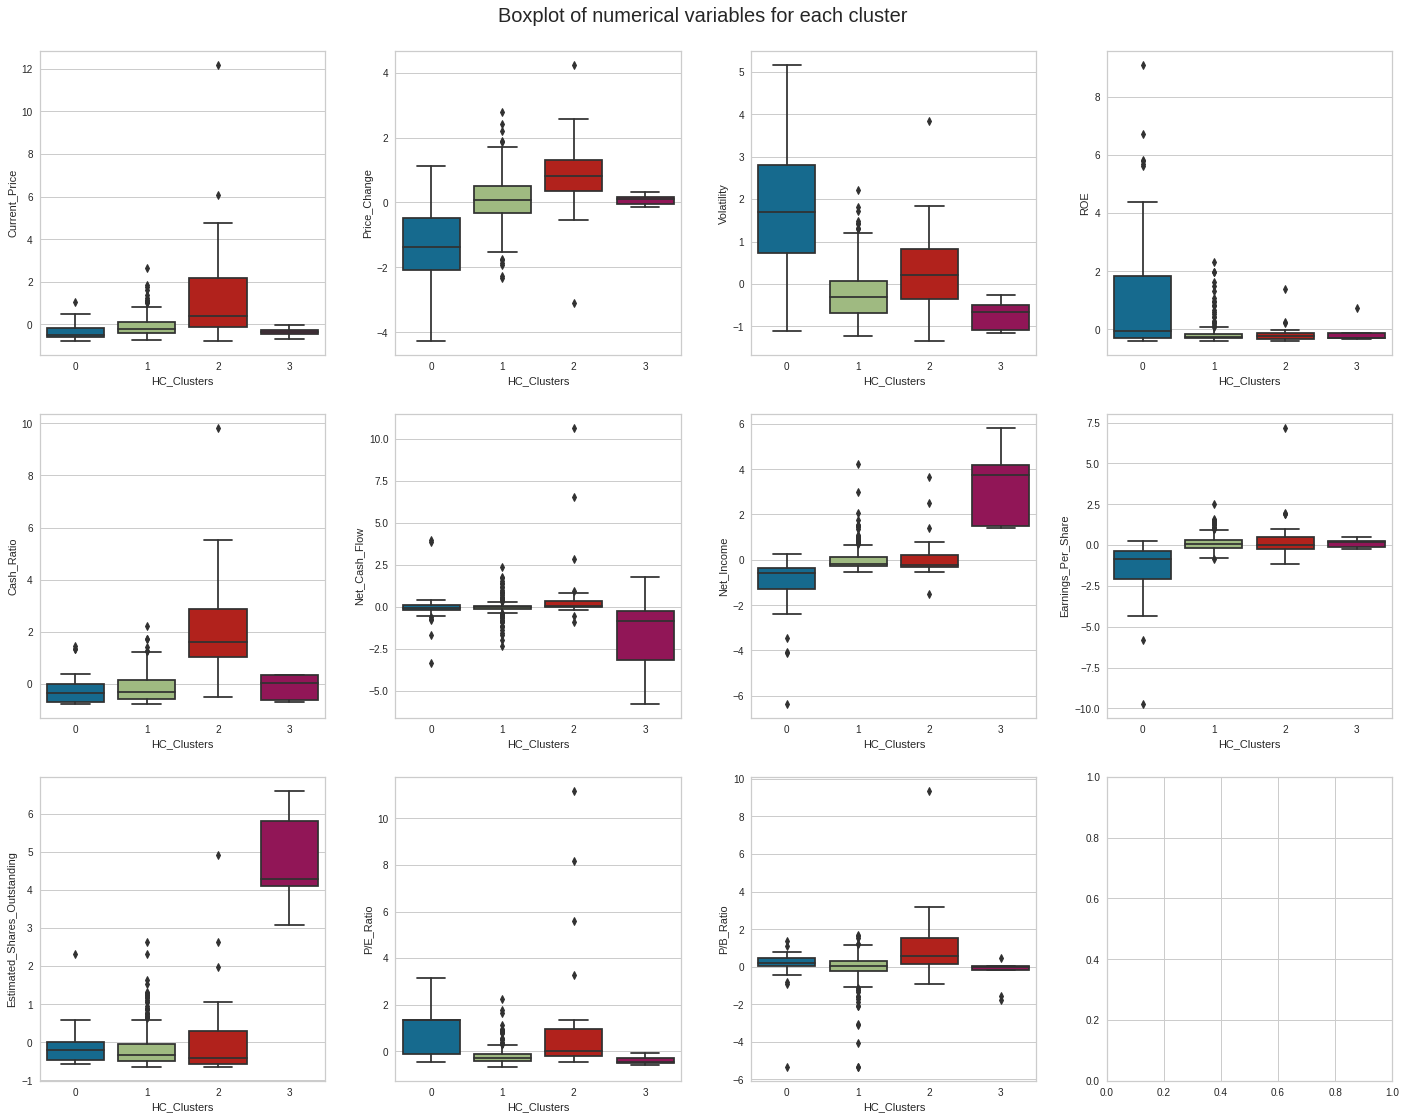

In [86]:
fig, axes = plt.subplots(3, 4,  figsize=(20, 16))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(4):
        if counter <11:
            sns.boxplot(ax=axes[ii, jj],y=subset_scaled_df[num_cols[counter]],x=subset_scaled_df['HC_Clusters'])
        counter = counter+1

fig.tight_layout(pad=2.0)

### Insights

Although, minor differences here and there, groupings obtained with Hierarchical clustering using Eucledian distance & Ward linkage is similar to the one obtained using K-Means clustering!

    Cluster 0 of Hierarchical clustering
        Similar to cluster 1 of K-Means clustering

    Cluster 1 of Hierarchical clustering
        Similar to cluster 3 of K-Means clustering

    Cluster 2 of Hierarchical clustering
        Similar to cluster 0 of K-Means clustering

    Cluster 3 of Hierarchical clustering
        Similar to cluster 2 of K-Means clustering

### Comparing cluster vs. GICS_Sector

In [87]:
pd.crosstab(df.GICS_Sector, df.HC_Clusters).style.highlight_max(color = 'lightgreen', axis = 0)

HC_Clusters,0,1,2,3
GICS_Sector,,,,
Consumer Discretionary,1,32,6,1
Consumer Staples,2,15,1,1
Energy,23,6,0,1
Financials,1,44,1,3
Health Care,0,30,9,1
Industrials,2,51,0,0
Information Technology,2,24,7,0
Materials,1,19,0,0
Real Estate,0,26,1,0


- Majority of securities in cluster 0 are in Energy.
- Majority of securities in cluster 1 are in Industrials.
- Majority of securities in cluster 2 are in Healthcare.
- Majority of securities in cluster 3 are in Financials.

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

### Comparing Hierarchical cluster vs. K-means  cluster

In [88]:
pd.crosstab(df.K_means_segments, df.HC_Clusters).style.highlight_max(color = 'lightgreen', axis = 0)

HC_Clusters,0,1,2,3
K_means_segments,,,,
0,1,0,24,0
1,26,0,1,0
2,0,1,1,9
3,5,272,0,0


The 4 clusters as identified by K-Means and Hierarchical Clustering are able to group 331 securities out of 340 securities in an identical fashion. 

### Dimensionality Reduction using PCA 

PCA has been performed to visualize the clusters from the two algorithms in a 2 dimensional space & to see how well-separated the clusters are

In [90]:
# let's set the number of components to 2 
pca = PCA(n_components=2)

# transforming the data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [91]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.38933325456234846

The two principal components explain  approximately 38.9% of the variance in the data

### Scatterplot by cluster labels - K-Means Clustering

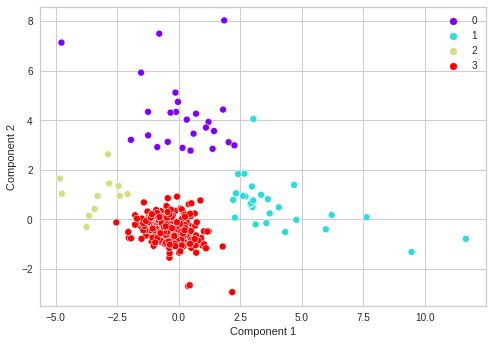

In [92]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df["K_means_segments"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))



- The 4 clusters are well separated, with 3 cluster containing majority of data points and other clusters capturing the outliers.

### Scatterplot by cluster labels - HierarchicalClustering

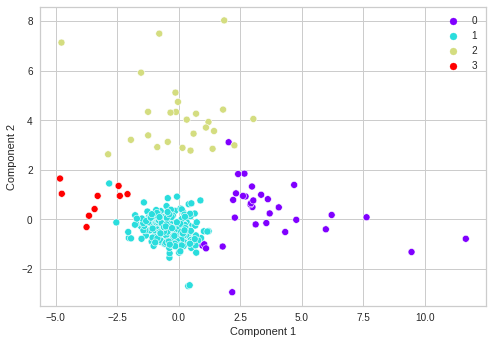

In [93]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

- The 4 clusters are well separated, with 1 cluster containing majority of data points and other clusters capturing the outliers.
- There are subtle differences in the plots obtained with K-Means clustering & Hierarchical clustering. However, there are more similarities than disimilarities in the obtained clusters

### Summary of clustering profiles

- The major cluster predominantly belonging to Industrials, Financials, Consumer Discretionary, Real Estate, & Informational Technology sectors was identified as being mildly aggressive & safe investment option.

- The industry segregation into clusters yielded similar results across both algorithms. 

- PCA performed for both clustering techniques yielded similar cluster densities in 2D space

- The Health Care sector was identified as being very aggressive (& high performing).

- The Energy sector was identified as very aggressive (but historically low performing).

- The Financials sector was identified as being moderately aggressive (& high performing).

## Actionable Insights and Recommendations

### Insights

- Informational Technology and Financial sectors have some of the highest Cash_Ratios making them favorable more so than other sectors

- Health Care and Financial sectors have seen some of the highest positive Price_Change, making them as the favorable pick to investors

- The Real Estate sector has seen minimum variation in Price_Change & minimum variation in Cash_Ratio across securities it encompasses making them a safer investment choice for investors.

- Energy sector has some of the highest variance in Price_Change across securities it encompasses, being more volatile and riskier for investors. However, this sector has securities with high P/E_Ratios. This indicates an investor is willing to invest more in a single share of a company in Energy sector per dollar value of its earnings as opposed to securities in any other sectors

### Recommendations

- Securities were segregated into 4 different clusters identifying very aggressive (high & low performing), moderately aggressive (& high performing) and mildly aggressive options. This is important in an effort to split the stocks across investments that are diversified, enabling one to maximize earnings in any market condition.

- It is important to keep in mind that stock market is often volatile, and past indicators may not always indicate future trends. Dynamic clustering (as more data is added each day) & movement of stocks across cluster groups due to changing market conditions needs to be further analyzed for making better predictions